<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project 3 - Introduction to Monte Carlo method

Yunhao Mo<br>
University of Manchester  
May 2021

In this project, we use the Monte Carlo method to simulate neutrons moving in three kinds of materials which were water, lead and graphite. The neutrons in the material may be absorbed or scattered by the molecules. We finally calculated the characteristic attenuation lengths of these three kinds of materials by measuring the percentage of the number of transmitted neutrons.  
We first initialise our Python interpreter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# 1D Uniform Random Number Generator
The Monte Carlo method is actually using random numbers to simulate some random process. Therefore, the first task we need to do is write a function to generate a uniform random number.   
The commend numpy.random.uniform() will output a random number between 0 and 1. In order to output a random number between any start values and any end values, we need to amplify the original random number's range, then add the start value on it which means:    
$$[0,1]\rightarrow [0,1] \times (end-start) = [0,end-start] \rightarrow [0,end-start] + start = [start, end]$$   
Here is the program to generate a random number array between a given start value and a given end value.

In [2]:
def generate_1d_random_number(start,end,number):
    random_number_array = np.array([]) 
    for counts in np.arange(0,number,1): # number is the number of random number we want to generate
        random_number = np.random.uniform() * (end - start) + start # Generate a random number between start and end
        random_number_array = np.append(random_number_array, random_number)
    return random_number_array

By using this function, we have generated an array containing 10000 random numbers between 0 and 1. To check if these random numbers are uniform, we plotted the histogram of this array with 20 bins. If the generated random numbers are uniform, the probability for each random number to drop in one of the bins is $\frac{1}{20}$. Therefore, the process is a binomial process. Hence, the standard deviation of the number in each bin should be:
$$ STD_{expected} = \sqrt{\frac{\mu(n-\mu)}{n}}$$
, where n is the total number, $\mu = \frac{n}{20}$ is the mean value of the number in each bin. If the random numbers we generated were uniform, most of the counts in each bin should be within one standard deviation of the mean value. 

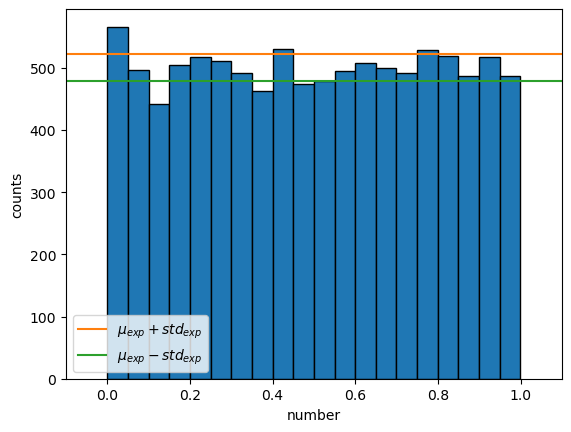

The standard deviation is 26.10
The expected standard deviation is 21.79


In [3]:
get_ipython().magic('matplotlib inline')
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
random_number_array = np.array([])#Creat a random number array
number = 10000 #The length of the random number array
start = 0 #Generated random number is bigger than 0
end = 1 #Generated random number is smaller than 1
random_number_array = generate_1d_random_number(start,end,number) # Generate a set of random numbers
count, bins, patches = plt.hist(random_number_array,bins=20,histtype='bar', ec='black') # plot the histogram and return the counts and bins
std_count = np.std(count) # standard deviation of the counts
aver_count = np.mean(count) # average value of the counts
aver_expected = number  / (len(bins)-1) # the expected average value of the counts
std_expected = np.sqrt(aver_expected * (number - aver_expected) / number) # the expected standard deviation of the counts
x_mean = np.arange(-0.2,1.2,0.1) # x of the mean value straight line
y_mean = np.zeros(len(x_mean)) + aver_expected # y of the mean value straight line
y_up = np.zeros(len(x_mean)) + aver_expected + std_expected # y of the mean value plus one standard deviation straight line
y_down = np.zeros(len(x_mean)) + aver_expected - std_expected# y of the mean value minus one standard deviation straight line
plt.plot(x_mean,y_up,label='$\mu_{exp} + std_{exp}$')
plt.plot(x_mean,y_down,label='$\mu_{exp} - std_{exp}$')
plt.xlabel('number')
plt.ylabel('counts')
plt.xlim(-0.1,1.1)
plt.legend()
plt.show()
print('The standard deviation is {0:.2f}'.format(std_count))
print('The expected standard deviation is {0:.2f}'.format(std_expected))

From the above figure, we found the counts of most of the bins were within the range from $\mu_{exp} - std_{exp}$ to $\mu_{exp} + std_{exp}$, which means the random number array we generated was uniform.

# 3D Uniform Random Number Generator
In this case, we have generated the 3D random number by two methods.   
1. We use the generate_1d_random_number function to generate three random number arrays as x, y and z. We expected that the random number generated by this method should be uniform.
2. We use the randssp.ipynb to generate the 3D random number array. We expected that the spectral problem would occur.


In [4]:
def generate_3d_uniform_random_number(number):
    n = number
    points = np.array([]) # Create the array of the 3d points.
    points = generate_1d_random_number (0,1,3 * n) # Because we have 3 dimensions
    points = points.reshape((3, n))
    return points

def randssp(p,q):
    global m, a, c, x
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    r = np.zeros([p,q])
    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    return r

number = 1000
points_uniform = generate_3d_uniform_random_number(number) # Uniform 3d random numbers
points_bias = randssp(3, number) # Biased 3d random number

Here is the plot of the random number generated by the first method. By rotating this figure, we found that the random numbers were uniform.

<IPython.core.display.Javascript object>


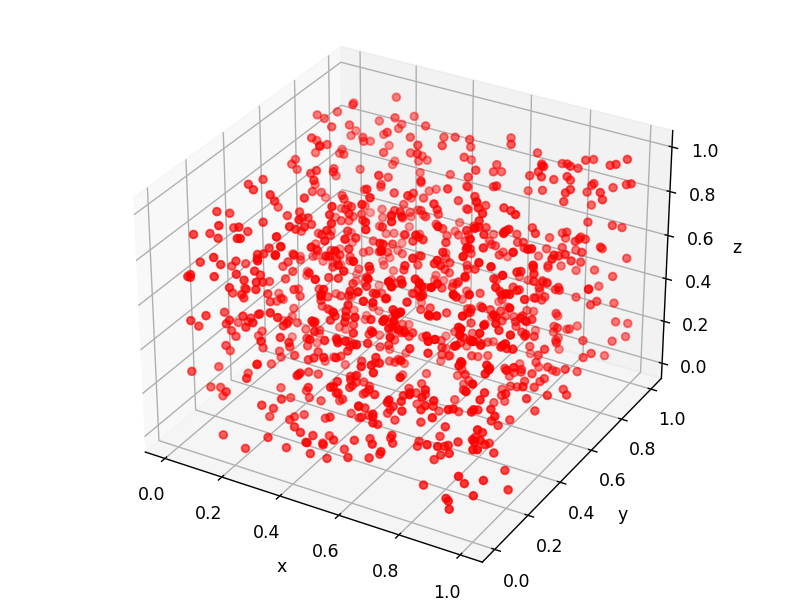

In [6]:
get_ipython().magic('matplotlib notebook')
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(points_uniform[0, :], points_uniform[1, :], points_uniform[2, :], color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Here is the plot of random number generated by randssp. When we rotate this figure, we found all of the points located in several plans, and there are several blank spaces between each two plants. 

<IPython.core.display.Javascript object>


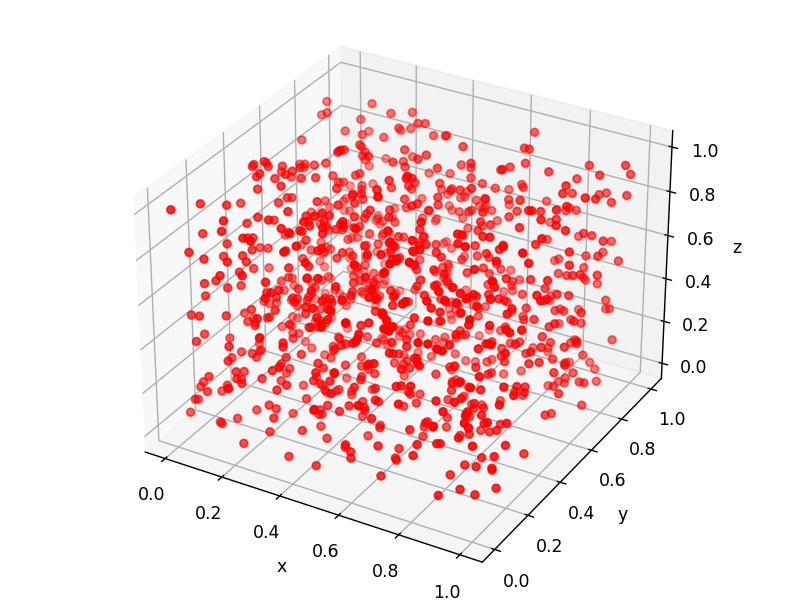

In [7]:
get_ipython().magic('matplotlib notebook') 
fig2 = plt.figure()
ax = Axes3D(fig2)
ax.scatter(points_bias[0, :], points_bias[1, :], points_bias[2, :], color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Calculate the attenuation length of the water
When a neutron moved in a material, it may be absorbed or scattered by the molecule. In this section, we assume molecules can only absorb neutrons. The number density of absorbing molecules is given by:
$$n = \frac{\rho N_A}{M}$$  
, where $\rho$ is the density of the material, $N_A$ is Avogadro constant, $M$ is the molar mass of the absorbing molecule.  
Therefore, the number of neutrons absorbed in a thin layer is  
$$N = n\sigma IL = \frac{\rho N_A \sigma IL}{M}$$  
, where $\sigma$ is the absorption cross-section of the material, $I$ is the neutron intensity, and $L$ is the thickness of the material.  
The rate of absorption per unit thickness is  
$$R = -\frac{dI}{dx} = n\sigma I$$  
By solving this equation, we obtain the equation of the intensity variation with a thickness which was 
$$I(x) = e^{-n\sigma x}$$  
We define the macroscopic cross section $\Sigma = n\sigma$ and the mean free path is $\lambda = \frac{1}{\Sigma}$. Therefore the intensity function can also be written as  
$$I(x) = e^{-x/\lambda}$$  
In order to simulate this process, we first need to generate a set of non-uniform distributed random numbers. The probability density function (PDF) of this distribution should be in the form of the exponential function.  
$$PDF(x) = e^{-x}$$  
To generate this kind of random numbers, we use the inverse distribution method.  
We firstly integrate this function from 0 to $x$ to get the cumulative distribution function (CDF). Then we find the inverse function of CDF. By substituting a set of uniform random numbers into the inverse function of CDF, the result would distribute according to the PDF.
$$CDF(x) = \int_{0}^{x}{PDF(x)} = 1-e^{-x}$$  
$$CDF^{-1}(x) = -ln(1-z)$$  
Therefore, if we have a set of uniform random number $u_i$, the exponential distributed random number $x_i$ could be generated by $-ln(1-u_i)$. Becase $0<u_i<1$, $s_i$ could also be generated by $-ln(u_i)$.  
Hence, according to the intensity equation, for mean free path $\lambda$, the random step size $s_i$ was equal to $-\lambda ln(u_i)$.
Here is the function to generate random step size.

In [8]:
def generate_exponential_step(number, lambda_material):
    n = number # number of neutrons
    uniform_random_number = generate_1d_random_number(0,1,n) # generate 1d uniform random number
    exponential_random_number = -lambda_material * np.log(uniform_random_number) # the random step size
    return exponential_random_number

In this simulation, we assume there are 2000 neutrons, and these neutrons move in only one dimension until they are absorbed. According to the intensity equation, since the number of survived neutrons decreased in the form of the exponential function of the distance travelled, we finally got a linear function by taking the logarithm on each side of this function.
$$ln(N_r) = -\frac{distance}{\lambda} + ln(N_0)$$  
, where $N_r$ is the number of survived neutrons, $N_0$ is the number of the original neutrons.
Hence, after applying linear fit on it, the mean free path $\lambda$ can be written as $\lambda = -\frac{1}{gradiant}$  
In the following program, we repeated this simulation 10 times to get the mean value of the survived number of neutrons and its standard deviation.

<IPython.core.display.Javascript object>


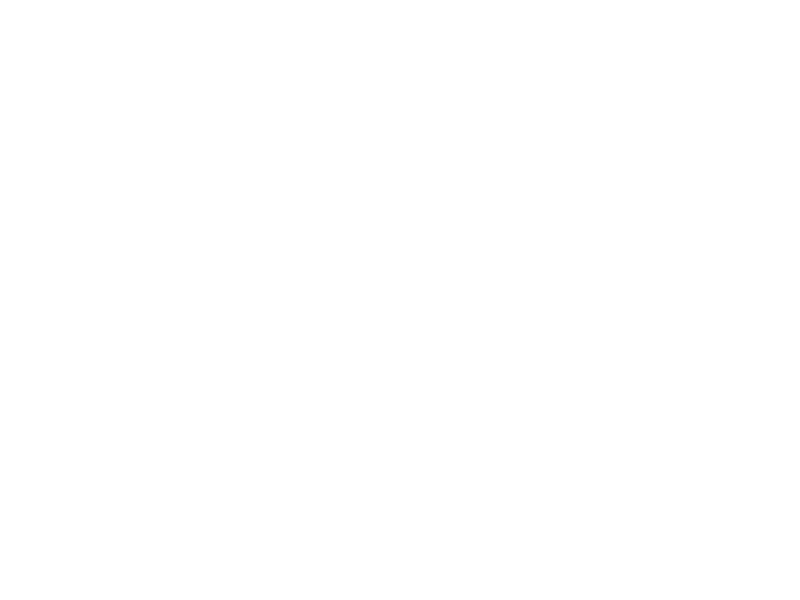

In [9]:
get_ipython().magic('matplotlib notebook') 
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
density_water = 1 # g/cm^3
molar_mass_water = 18 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n = density_water * Na / molar_mass_water # Number of absorbing molecules
absorption_water = 0.6652 * 10**-24 # cm^2
lambda_water = 1 / (n * absorption_water) # Mean free path of water
count_matrix = np.array([]) # array of the number of the neutrons in each bin
log_count_array = np.array([]) # log of the number of the neutrons in each bin
bins_array = np.array([])
number = 5000 # total number of neutrons
for repeat_time in np.arange(10): # repeat the simulation for 10 times
    exponential_random_number = np.array([])
    exponential_random_number = generate_exponential_step(number, lambda_water) # random step size array
    count, bins = np.histogram(exponential_random_number, 30, range=(0,200)) # count the number of neutrons in each bin
    if repeat_time == 0:
        count_matrix = count # in the first time, the count_matrix array is empty
    else:
        count_matrix = np.vstack((count_matrix,count))
# plot the histogram
plt.hist(exponential_random_number, 30, range=(0,200),histtype='bar', ec='black')
plt.xlabel('Distance(cm)')
plt.ylabel('Counts')
plt.title('Inverse CDF, exponential distribution')
plt.text(70,600,'Number of neutrons = {0}'.format(number))
plt.text(70,570,'Input mean free path = 45cm')
plt.show()

mean_count = np.mean(count_matrix, axis = 0) # mean value of the count
std_count = np.std(count_matrix, axis = 0) # standard deviation of the count
log_count = np.array([]) # logarithm of the count
final_bins = np.array([]) # the bins for which the counts number is not zero
normalized_error = np.array([]) # the normalized error array
weight_array = np.array([]) # the weight array
for counter, c in enumerate(mean_count):
    if c != 0:
        log_count = np.append(log_count, np.log(c))
        final_bins = np.append(final_bins, bins[counter])
        normalized_error = np.append(normalized_error, std_count[counter] / mean_count[counter])
weight_array = 1/ normalized_error
result = np.polyfit(final_bins,log_count,deg=1,w=weight_array,cov=True)

<IPython.core.display.Javascript object>


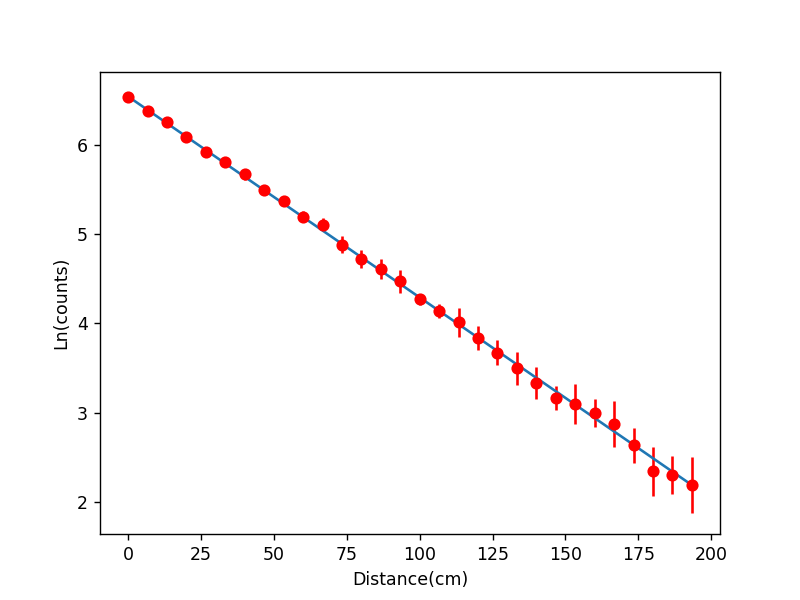

The characteristic attenuation length = 44.3806 +/- 0.0001
The reduced chi square = 0.13


In [10]:
get_ipython().magic('matplotlib notebook') 
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
gradient = result[0][0]
intercept = result[0][1]
cov = result[1] # covariance matrix
expected_log_count = gradient * final_bins + intercept # y of the fitted straight line
# calculate the reduced chi-square
residual = expected_log_count - log_count
chi_square = np.sum((residual / normalized_error)**2)
reduced_chi_square = chi_square / (len(log_count)-2)
# plot errorbar figure
plt.errorbar(final_bins, log_count,normalized_error,fmt='ro')
plt.plot(final_bins,expected_log_count)
plt.xlabel('Distance(cm)')
plt.ylabel('Ln(counts)')
plt.show()
characteristic_attenuation_length = 1 / gradient
uncertainty = np.sqrt(cov[0][0])
print('The characteristic attenuation length = {0:.4f} +/- {1:.4f}'.format(-characteristic_attenuation_length,uncertainty))
print('The reduced chi square = {0:.2f}'.format(reduced_chi_square))

# Generate Spherical 3D Unit Vector
In this case, we want to investigate the case when the neutron moves in three dimensions. Firstly, we write a function to generate uniform random unit vectors as the direction of the neutron's movement.  
In the shperical coordinates:
$$x = rsin(\theta)cos(\phi)$$
$$y = rsin(\theta)sin(\phi)$$
$$z = rcos(\theta)$$  
, where r is the radius of the sphere which is 1, $0<\theta<\pi$ and $0<\phi<2\pi$.  
If we use a set of uniform random number as the angle $\theta$, we will get much more points at two poles of the sphere. Therefore, just like what we have mentioned in the section of generating exponential steps, we will generate $\theta_i$ in the form of $arccos(1-2u_i)$.
Here is the program. From the figure generated by this program, we found the generated points were uniform.

<IPython.core.display.Javascript object>


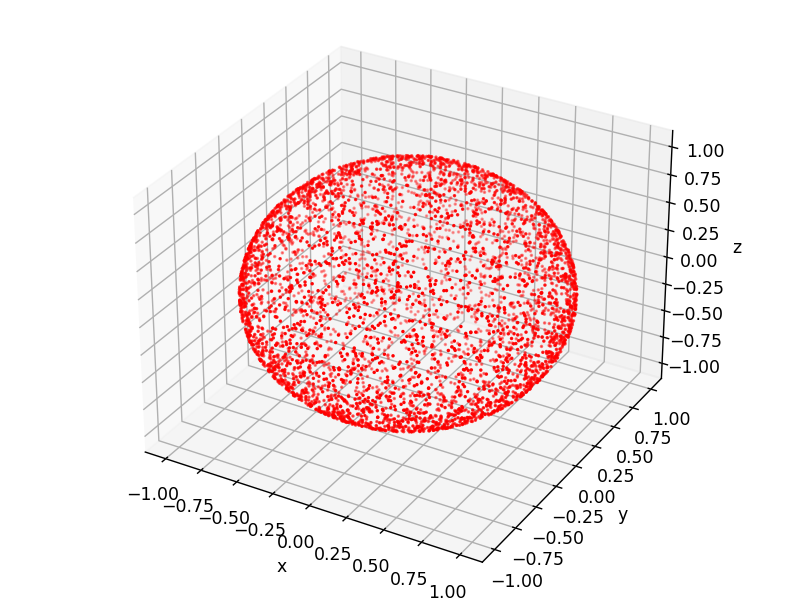

In [11]:
def generate_isotropic_unit_vectors(number):
    u = generate_1d_random_number(0,1,number) # uniform random number
    phi = generate_1d_random_number(0,2*np.pi,number) # phi angle which is bigger than 0 and smaller than 2pi
    theta = np.arccos(1 - 2 * u) # theta angle which is bigger than 0 and smaller than pi
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    points = np.vstack((x,y,z)) # generated 3d unit vector
    return points

number = 5000 # number of points
points = generate_isotropic_unit_vectors(number)

get_ipython().magic('matplotlib notebook')

fig1 = plt.figure()
ax = Axes3D(fig1)
ax.scatter(points[0, :], points[1, :], points[2, :], color='r',s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

After getting the uniform 3d unit vector, we can start to do the simulation. In this simulation, the neutrons can be absorbed and scattered by the molecule. The absorption cross-section is $\sigma_a$ and the scattering cross-section is $\sigma_s$. Therefore, the total macroscopic cross-section is given by:  
$$\Sigma_T = \Sigma_s + \Sigma_a = n\sigma_s + n\sigma_a$$
, where n is the number density of the molecule. The total mean free path $\lambda_T = \frac{1}{\Sigma_T}$. Hence, the probability for the neutron been absorbed at each step is  
$$P_a = \frac{\Sigma_a}{\Sigma_T}$$ In each step of a neutron's movement, we can generate an uniform random number between 0 and 1. If this random number is smaller than $P_a$, the neutron will be absorbed. If it is bigger than $P_a$, the neutron will be scattered and move to a new position.
In this simulation, we will count how many of neutrons were backscattered(when their x coordinate is smaller than 0), how many of neutrons were absorbed and how many of neutrons transmitted the material(when their x coordinate is bigger than the thickness of the material)  
Here is the program of this simulation.

In [12]:
def generate_random_walk(number, lambda_material):
    direction = generate_isotropic_unit_vectors(number) #Direction of the step 
    length = generate_exponential_step(number, lambda_material) #length of the step
    step = direction * length
    return step
    
def simulation(lambda_material, probability_absorb,number, thickness, figure_flag):
    #figure_flage is a 1 * 3 array. this is used to check if we want to plot the trace of the neutron.
      #the first number in this array is the number of absorbed neutron's trace figure
      #the second number is the number of the reflected neutron's trace figure
      #the third number is the number of the transmitted neutron's trace figure
    #Calculate the first step of the x position
    x_position = generate_exponential_step(number, lambda_material)
    #Generate random y and z position arrays.
    y_position = generate_1d_random_number(-1, 1, number)
    z_position = generate_1d_random_number(-1, 1, number)
    number_absorbed = 0 # number of absorbed particles
    number_transmitted= 0 # number of transmitted particles
    number_reflected = 0 # number of reflected particles
    for particle in np.arange(0,number,1):
        if np.sum(figure_flag) > 0: # if we want to plot at least one figre, we need to save all of the locations of the neutron 
            path = np.hstack((x_position[particle],y_position[particle],z_position[particle]))
        is_absorbed = 0 #flag of whether or not been absorbed
        x = x_position[particle] # initial x position of the particle
        P = np.random.uniform() # a uniform random number to compare with the probability of absorption
        if P < probability_absorb: # the neutron is absorbed
            is_absorbed = 1
            number_absorbed += 1
        elif x < 0: # neutron is reflected
            number_reflected += 1
        elif x > thickness: # neutron has transmitted
            number_transmitted += 1
        else: # the neutron is scattered
            while is_absorbed == 0 and x > 0 and x < thickness: # if the neutron is not absorbed and within the material
                P = generate_1d_random_number(0,1,1)
                add_position = generate_random_walk(1,lambda_material)
                #calculate the new position
                x_position[particle] = x_position[particle] + add_position[0]
                y_position[particle] = y_position[particle] + add_position[1]
                z_position[particle] = z_position[particle] + add_position[2]
                x = x_position[particle]
                y = y_position[particle]
                z = z_position[particle]
                if np.sum(figure_flag) > 0: # if we want to plot at least one figure of trace
                    new_position = np.hstack((x,y,z))
                    path = np.vstack((path,new_position))
                if P < probability_absorb:
                    if figure_flag[0] > 0: # if we want to plot absorbed neutron's trace figure
                        title = 'Walk of the absorbed neutron'
                        plot_walk(path,title)
                        figure_flag[0] -= 1
                    is_absorbed = 1 # the neutron has been absorbed
                    number_absorbed += 1
                elif x < 0: # check if it is reflected
                    if figure_flag[1] > 0: # if we want to plot reflected neutron's trace figure
                        title = 'Walk of the reflected neutron'
                        plot_walk(path,title)
                        figure_flag[1] -= 1
                    number_reflected += 1
                elif x > thickness: # check if it has transmitted
                    number_transmitted += 1
                    if figure_flag[2] > 0: # if we want to plot transmitted neutron's trace figure
                        title = 'Walk of the transmitted neutron'
                        plot_walk(path,title)
                        figure_flag[2] -= 1
    return number_absorbed, number_reflected, number_transmitted

def neutron_walk(probability_material,lambda_material,repeat_time):
    final_absorbed = np.array([]) # final number of absorbed neutrons
    final_reflected = np.array([]) # final number of reflected neutrons
    final_transmitted = np.array([]) # final number of the transmitted neutrons
    final_thickness = np.array([]) # thickness corrosponding to non-zero number of neutrons
    for thickness in thickness_array: # thickness of the material 
        for number in number_array: # total number of neutrons
            #number of neutrons in each case
            number_absorbed = np.array([])
            number_reflected = np.array([])
            number_transmitted = np.array([])
            # repeat several times to get the standard deviation of the number
            for running_time in np.arange(repeat_time):
                Na, Nr, Nt= simulation(lambda_material, probability_material, number, thickness,figure_flag)
                number_absorbed = np.append(number_absorbed, Na)
                number_reflected = np.append(number_reflected, Nr)
                number_transmitted = np.append(number_transmitted, Nt)
            mean_absorbed = np.mean(number_absorbed)
            mean_reflected = np.mean(number_reflected)
            mean_transmitted = np.mean(number_transmitted)
            std_absorbed = np.std(number_absorbed)
            std_reflected = np.std(number_reflected)
            std_transmitted = np.std(number_transmitted)
            # if any of them is 0, we don't need to add it into the final array
            if mean_absorbed * mean_reflected * mean_transmitted != 0: 
                final_absorbed = np.append(final_absorbed, mean_absorbed)
                final_absorbed = np.append(final_absorbed, std_absorbed)
                final_reflected = np.append(final_reflected, mean_reflected)
                final_reflected = np.append(final_reflected, std_reflected)
                final_transmitted = np.append(final_transmitted, mean_transmitted)
                final_transmitted = np.append(final_transmitted, std_transmitted)
                final_thickness = np.append(final_thickness, thickness)
    length = len(final_absorbed) # length of the final array
    final_absorbed = np.reshape(final_absorbed, (int(length / 2),2))
    final_reflected = np.reshape(final_reflected, (int(length / 2),2))
    final_transmitted = np.reshape(final_transmitted, (int(length / 2),2))
    return final_absorbed, final_reflected, final_transmitted, final_thickness

We also want to plot the trace figure. So here is the function to plot it.

In [13]:
def plot_walk(path,title):
    get_ipython().magic('matplotlib notebook') 
    plt.rcParams.update({'font.size': 14})
    plt.style.use('default')
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(path[:,0], path[:,1],path[:,2],c='blue',lw=0.1,alpha=0.5)
    ax.quiver(path[:-1,0], path[:-1,1],path[:-1,2],path[1:,0]-path[:-1,0],path[1:,1]-path[:-1,1], path[1:,2]-path[:-1,2],color='g',linewidths=1)
    fig.suptitle(title, fontsize=16)
    plt.show()

This program is used to print result in the certain format.

In [14]:
def print_final_result(material):
    counter = 0
    for thickness in thickness_array:
        for number in number_array:
            reflect = final_reflected[counter,0]
            std_reflect = final_reflected[counter,1]
            absorb = final_absorbed[counter,0]
            std_absorb = final_absorbed[counter,1]
            transmite = final_transmitted[counter,0]
            std_transmite = final_transmitted[counter,1]
            Pt = transmite / number * 100
            SPt = std_transmite / number * 100
            Pr = reflect / number * 100
            SPr = std_reflect / number * 100
            Pa = absorb / number * 100
            SPa = std_absorb / number *100
            print('--------------------------------------')
            print('Transmission Through A Fixed Thickness - {0}'.format(material))
            print('--------------------------------------')
            print('Thickness:    {0}cm'.format(thickness))
            print('Total Neutrons:     {0}'.format(number))
            print('Neutrons Reflected:    {0:0.1f}+/-{1:0.1f}'.format(reflect,std_reflect))
            print('Neutrons Absorbed:     {0:0.1f}+/-{1:0.1f}'.format(absorb,std_absorb))
            print('Neutrons Transmitted:  {0:0.1f}+/-{1:0.1f}'.format(transmite,std_transmite))
            print('Percentage Transmitted:{0:0.3f}+/-{1:0.3f} %'.format(Pt,SPt))
            print('Percentage Reflected:  {0:0.3f}+/-{1:0.3f} %'.format(Pr,SPr))
            print('Percentage Absorbed:   {0:0.3f}+/-{1:0.3f} %'.format(Pa,SPa))
            counter += 1

# Comparition of these three materials 
## Water
The scattering cross-section of the water is 3.45 $cm^{-1}$  
The absorption cross-section of the water is 0.02 $cm^{-1}$
## Lead
The scattering cross-section of the lead is 0.37 $cm^{-1}$  
The absorption cross-section of the lead is 0.005 $cm^{-1}$
## Graphite
The scattering cross-section of the graphite is 0.40 $cm^{-1}$  
The absorption cross-section of the graphite is 0.0003 $cm^{-1}$  
Because the scattering cross-section and the absorption cross-section of water are the biggest, we expect that water will have the highest percentage of reflected and absorbed neutrons.

# Water case

<IPython.core.display.Javascript object>


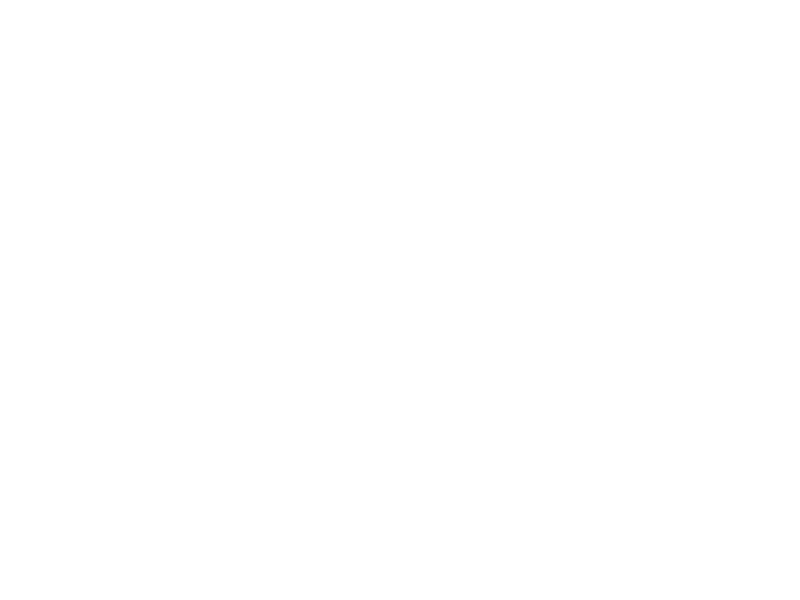

<IPython.core.display.Javascript object>


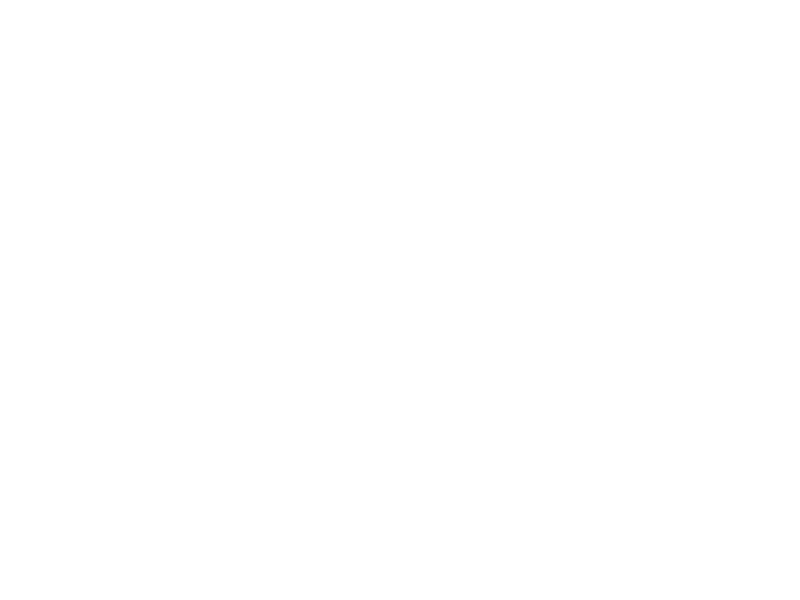

<IPython.core.display.Javascript object>


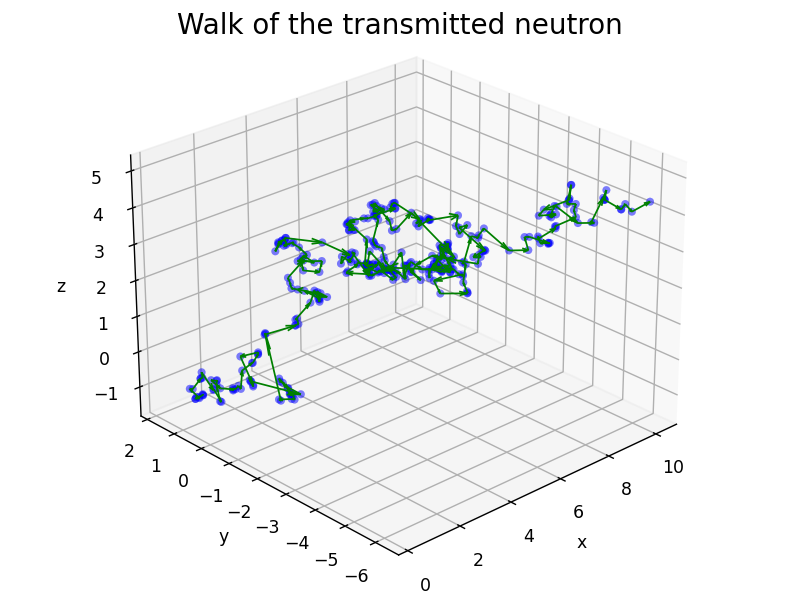

--------------------------------------
Transmission Through A Fixed Thickness - water
--------------------------------------
Thickness:    10cm
Total Neutrons:     2000
Neutrons Reflected:    1591.4+/-15.3
Neutrons Absorbed:     400.6+/-14.8
Neutrons Transmitted:  8.0+/-2.5
Percentage Transmitted:0.400+/-0.126 %
Percentage Reflected:  79.570+/-0.767 %
Percentage Absorbed:   20.030+/-0.738 %


In [16]:
get_ipython().magic('matplotlib notebook')
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
final_absorbed = np.array([])# final number of the absorbed neutrons
final_reflected = np.array([]) # final number of the reflected neutrons
final_transmitted = np.array([]) # final number of the transmitted neutrons
final_thickness = np.array([])# thickness corrosponding to non-zero number of neutrons
number_array = np.array([2000]) # number of neutrons
thickness_array = np.array([10]) # thickness of the water
density_water = 1 # g/cm^3
molar_mass_water = 18 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n_water = density_water * Na / molar_mass_water # Number of absorbing water molecules
absorption_water = 0.6652 * 10**-24 # cm^2
scattering_water = 103 * 10**-24 # cm^2
lambda_water = 1 / (n_water * absorption_water + n_water * scattering_water) # Mean free path of water
probability_water = absorption_water / (absorption_water + scattering_water) # probability of absorption
# we want to plot 1 absorbed neutron's trace figure, 1 reflected neutron's figure and 1 transmitted neutron's figure
figure_flag = np.array([1,1,1]) 
# for each sub-cases, we want to repeat 5 times to get the standard deviation.
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_water,lambda_water,repeat_time)
print_final_result('water')

# Lead case

In [17]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([2000]) # number of neutrons
thickness_array = np.array([10]) # thickness of the water cm
density_lead = 11.35 # g/cm^3
molar_mass_lead = 207.2 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n_lead = density_lead * Na / molar_mass_lead # Number of absorbing lead atoms
absorption_lead = 0.158 * 10**-24 # cm^2
scattering_lead = 11.221 * 10**-24 # cm^2
lambda_lead = 1 / (n_lead * absorption_lead + n_lead * scattering_lead) # Mean free path of lead
probability_lead = absorption_lead / (absorption_lead + scattering_lead)
figure_flag = np.array([0,0,0]) # we do not want any figure
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_lead,lambda_lead,repeat_time)
print_final_result('lead')

--------------------------------------
Transmission Through A Fixed Thickness - lead
--------------------------------------
Thickness:    10cm
Total Neutrons:     2000
Neutrons Reflected:    1222.6+/-19.6
Neutrons Absorbed:     224.8+/-17.3
Neutrons Transmitted:  552.6+/-7.7
Percentage Transmitted:27.630+/-0.383 %
Percentage Reflected:  61.130+/-0.978 %
Percentage Absorbed:   11.240+/-0.864 %


# Graphite case

In [18]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([2000]) # number of neutrons
thickness_array = np.array([10]) # thickness of the water
density_graphite = 1.67 # g/cm^3
Na = 6.022 * 10**23 # Avogadro constant
molar_mass_graphite = 12.011 # g/mol
n_graphite = density_graphite * Na / molar_mass_graphite
absorption_graphite = 0.0045 * 10**-24 # cm^2
scattering_graphite = 4.74 * 10**-24 # cm^2
lambda_graphite = 1 / (n_graphite * absorption_graphite + n_graphite * scattering_graphite)
probability_graphite = absorption_graphite / (absorption_graphite + scattering_graphite)
figure_flag = np.array([0,0,0])
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_lead,lambda_lead,repeat_time)
print_final_result('graphite')

--------------------------------------
Transmission Through A Fixed Thickness - graphite
--------------------------------------
Thickness:    10cm
Total Neutrons:     2000
Neutrons Reflected:    1235.2+/-23.7
Neutrons Absorbed:     216.2+/-12.7
Neutrons Transmitted:  548.6+/-23.9
Percentage Transmitted:27.430+/-1.196 %
Percentage Reflected:  61.760+/-1.183 %
Percentage Absorbed:   10.810+/-0.635 %


All of these output data satisfied our expectation. 
Then we investigated the influence on the standard deviation of the number neutron when the total number of it was changing. In this case, we set the total number of it changing from 100 to 5000.

In [19]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([100,500,1000,2000,5000]) # number of neutrons
thickness_array = np.array([5]) # thickness of the water
figure_flag = np.array([0,0,0])
repeat_time = 10
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_lead,lambda_lead,repeat_time)
print_final_result('graphite')

--------------------------------------
Transmission Through A Fixed Thickness - graphite
--------------------------------------
Thickness:    5cm
Total Neutrons:     100
Neutrons Reflected:    46.4+/-3.9
Neutrons Absorbed:     6.3+/-2.3
Neutrons Transmitted:  47.3+/-5.3
Percentage Transmitted:47.300+/-5.255 %
Percentage Reflected:  46.400+/-3.878 %
Percentage Absorbed:   6.300+/-2.283 %
--------------------------------------
Transmission Through A Fixed Thickness - graphite
--------------------------------------
Thickness:    5cm
Total Neutrons:     500
Neutrons Reflected:    232.9+/-10.6
Neutrons Absorbed:     31.6+/-2.9
Neutrons Transmitted:  235.5+/-9.8
Percentage Transmitted:47.100+/-1.966 %
Percentage Reflected:  46.580+/-2.117 %
Percentage Absorbed:   6.320+/-0.581 %
--------------------------------------
Transmission Through A Fixed Thickness - graphite
--------------------------------------
Thickness:    5cm
Total Neutrons:     1000
Neutrons Reflected:    462.8+/-12.8
Neutrons 

From these results, we found that when the total number of neutrons increased, the standard deviation also increased. We expected that the uncertainty of the number of neutrons with a specific interaction should be varied approximately as $\sqrt{N}$, where $N$ is the total number of neutrons having that interaction. We do not have a close value because the number of neutrons we use here is not enough.

# Characteristic Attenuation Length
In this case, we have changed the thickness of the material to calculate the characteristic attenuation length.


In [20]:
def plot_fraction_thickness():
    #this is used to plot the percentage of number of neutrons against the thickness
    get_ipython().magic('matplotlib inline') 
    plt.rcParams.update({'font.size': 14})
    plt.style.use('default')
    Pa = final_absorbed[:,0] / number_array[0] # Fraction of absorbed neutrons
    Pr = final_reflected[:,0] / number_array[0] # Fraction of reflected neutrons
    Pt = final_transmitted[:,0] / number_array[0] # Fraction of transmitted neutrons
    std_Pa = final_absorbed[:,1] / number_array[0] # error of fraction of absorbed neutrons
    std_Pr = final_reflected[:,1] / number_array[0] # error of fraction of reflected neutrons
    std_Pt = final_transmitted[:,1] / number_array[0] # error of fraction of transmitted neutrons
    plt.errorbar(final_thickness,Pa,yerr=std_Pa,label='Absorbed neutrons')
    plt.errorbar(final_thickness,Pr,yerr=std_Pr,label='Reflected neutrons')
    plt.errorbar(final_thickness,Pt,yerr=std_Pt,label='Transmitted neutrons')
    plt.xlabel('Thickness (cm)')
    plt.ylabel('Fraction of neutrons')
    plt.legend()
    plt.show()

In [21]:
def calculate_attenuation_length(final_transmitted,thickness):
    get_ipython().magic('matplotlib inline') 
    plt.rcParams.update({'font.size': 14})
    plt.style.use('default')
    Pt = final_transmitted[:,0] / number_array[0] # the percentage of transmitted neutrons
    error = final_transmitted[:,1] / final_transmitted[:,0] # the error of the percentage of the transmitted neutrons
    final_Pt = np.array([])
    log_Pt = np.array([])
    final_weight = np.array([])
    final_thickness = np.array([])
    for counter, P in enumerate(Pt): # to check if the number of transmitted neutrons is 0
        if P != 0:
            weight = 1 / error[counter]
            log_Pt = np.append(log_Pt, np.log(P)) # ln(percentage of transmitted neutrons)
            final_weight = np.append(final_weight, weight)
            final_thickness = np.append(final_thickness, thickness_array[counter])
    result = np.polyfit(final_thickness, log_Pt, deg=1,w=final_weight,cov=True)
    gradient = result[0][0]
    intercept = result[0][1]
    cov = result[1] # covariance matrix
    expected_log_Pt = gradient * final_thickness + intercept # y of the fitted straight line
    # calculate the reduced chi-square
    residual = expected_log_Pt - log_Pt
    chi_square = np.sum((residual * final_weight)**2)
    reduced_chi_square = chi_square / (len(log_count)-2)
    plt.errorbar(final_thickness, log_Pt,1/final_weight,fmt='ro')
    plt.plot(final_thickness,expected_log_Pt)
    plt.xlabel('Thickness(cm)')
    plt.ylabel('Ln(fraction)')
    plt.show()
    calculated_attenuation_length = -1 / gradient
    uncertainty = np.sqrt(cov[0][0])
    print('The characteristic attenuation length = {0:.3f} +/- {1:.3f} cm'.format(calculated_attenuation_length,uncertainty))
    print('The reduced chi square = {0:.2f}'.format(reduced_chi_square))

## Characteristic Attenuation Length of Water

Here is the result and figure of the characteristic attenuation length in water.

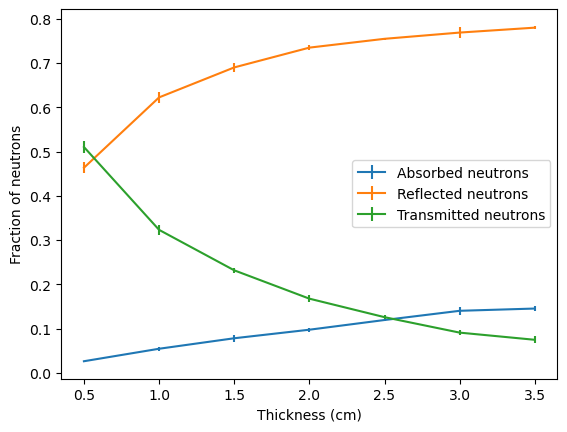

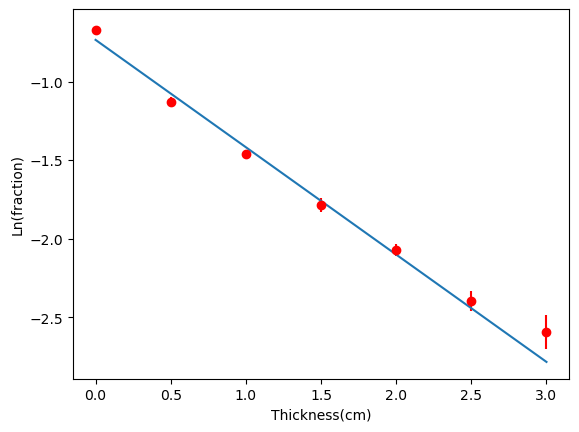

The characteristic attenuation length = 1.464 +/- 0.031 cm
The reduced chi square = 0.58


In [36]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([2000]) # number of neutrons
thickness_array = np.arange(0,4,0.5) # thickness of the water
density_water = 1 # g/cm^3
molar_mass_water = 18 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n_water = density_water * Na / molar_mass_water # Number of absorbing water molecules
absorption_water = 0.6652 * 10**-24 # cm^2
scattering_water = 103 * 10**-24 # cm^2
lambda_water = 1 / (n_water * absorption_water + n_water * scattering_water) # Mean free path of water
probability_water = absorption_water / (absorption_water + scattering_water) # probability of absorption
figure_flag = np.array([0,0,0])
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_water,lambda_water,repeat_time)
plot_fraction_thickness()
calculate_attenuation_length(final_transmitted,final_thickness)

## Characteristic Attenuation Length of Lead

Here is the result and figure of the case of lead.

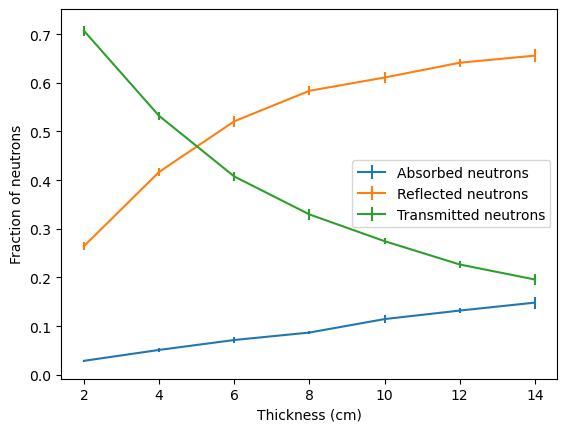

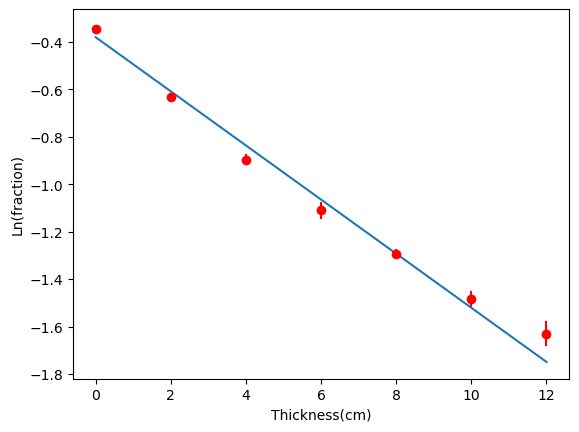

The characteristic attenuation length = 8.763 +/- 0.005 cm
The reduced chi square = 0.81


In [23]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([2000]) # number of neutrons
thickness_array = np.arange(0,15,2) # thickness of the water
density_lead = 11.35 # g/cm^3
molar_mass_lead = 207.2 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n_lead = density_lead * Na / molar_mass_lead # Number of absorbing lead atoms
absorption_lead = 0.158 * 10**-24 # cm^2
scattering_lead = 11.221 * 10**-24 # cm^2
lambda_lead = 1 / (n_lead * absorption_lead + n_lead * scattering_lead) # Mean free path of lead
probability_lead = absorption_lead / (absorption_lead + scattering_lead)
figure_flag = np.array([0,0,0])
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_lead,lambda_lead,repeat_time)
plot_fraction_thickness()
calculate_attenuation_length(final_transmitted,final_thickness)

## Characteristic Attenuation Length of Graphite

Here is the result and figure of the case of graphite.

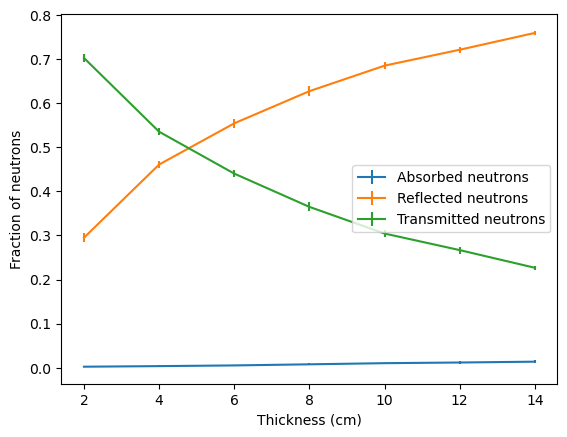

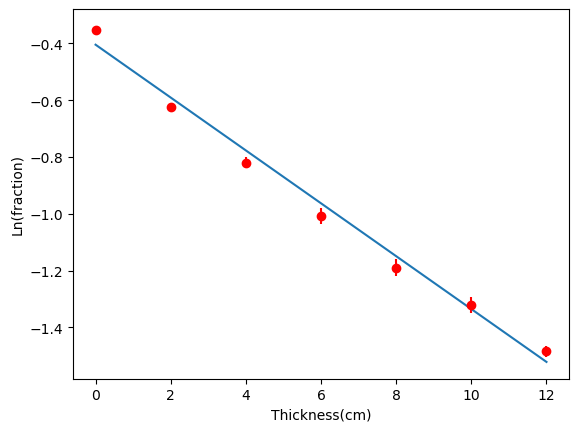

The characteristic attenuation length = 10.744 +/- 0.004 cm
The reduced chi square = 1.17


In [24]:
final_absorbed = np.array([])
final_reflected = np.array([])
final_transmitted = np.array([])
final_thickness = np.array([])
number_array = np.array([2000]) # number of neutrons
thickness_array = np.arange(0,15,2) # thickness of the water
density_graphite = 1.67 # g/cm^3
Na = 6.022 * 10**23 # Avogadro constant
molar_mass_graphite = 12.011 # g/mol
n_graphite = density_graphite * Na / molar_mass_graphite
absorption_graphite = 0.0045 * 10**-24 # cm^2
scattering_graphite = 4.74 * 10**-24 # cm^2
lambda_graphite = 1 / (n_graphite * absorption_graphite + n_graphite * scattering_graphite)
probability_graphite = absorption_graphite / (absorption_graphite + scattering_graphite)
figure_flag = np.array([0,0,0])
repeat_time = 5
final_absorbed, final_reflected, final_transmitted, final_thickness = neutron_walk(probability_graphite,lambda_graphite,repeat_time)
plot_fraction_thickness()
calculate_attenuation_length(final_transmitted,final_thickness)

Therefore, graphite has the biggest characteristic attenuation length, lead has the second biggest one and that of the water is the smallest one. The material with higher characteristic attenuation length will have higher pencentage of transmitted neutrons.

# Woodcock method
In this case, we use the Woodcock method to investigate when two materials are contacted. One of them is water; the other one is graphite. Both of them have a thickness of 10 cm. In this case, the neutrons will enter the graphite firstly then enter the water. When the neutrons travelled in the graphite whose total macroscopic is smaller than that of water, it may have fictitious steps. In this case, the neutron will not be scattered or absorbed by the molecule, which means the direction of movement will not change. The macroscopic cross-section of it is the same as that of the water (The max value of the macroscopic cross-section of these two materials). Therefore, the probability of this fictitious steps happened is   $$P_f = \frac{\Sigma_{water}}{\Sigma_{water}+\Sigma_{graphite}}$$  
When the neutrons do not travel in this step or travelled in the other material (water), they can be absorbed or scattered, just like what we have done in the previous program. Here is the program of it.

In [25]:
def woodcock_method(sigma_absorbed_1,sigma_scattered_1, sigma_absorbed_2,sigma_scattered_2,number,fig):
    # sigma_absorbed_1 is the macroscopic cross section of the absorption of the first material
    sigma_1 = sigma_absorbed_1 + sigma_scattered_1
    sigma_2 = sigma_absorbed_2 + sigma_scattered_2
    sigma_fictitious = np.max((sigma_1, sigma_2))
    sigma_total = sigma_1 + sigma_2
    lambda_fictitious = 1 / sigma_fictitious
    lambda_1 = 1 / sigma_1
    lambda_2 = 1 / sigma_2
    x_initial = generate_exponential_step(number, lambda_1)
    y_initial = generate_1d_random_number(-1, 1, number)
    z_initial = generate_1d_random_number(-1, 1, number)
    number_absorbed = 0 # number of absorbed particles
    number_transmitted= 0 # number of transmitted particles
    number_reflected = 0 # number of reflected particles
    final_path = np.array([])
    for particle in np.arange(0,number,1):
        x_array = np.array([])
        y_array = np.array([])
        z_array = np.array([])
        x_array = np.append(x_array, x_initial[particle])
        y_array = np.append(y_array, y_initial[particle])
        z_array = np.append(z_array, z_initial[particle])
        is_first_step = True
        is_absorbed = 0
        while is_absorbed == 0 and x_array[-1] > 0 and x_array[-1] < 20:
            if x_array[-1] < 10:
                flag_fictitious = generate_1d_random_number(0,1,1)
                P_fictitious = sigma_fictitious / sigma_total
                if flag_fictitious < P_fictitious:
                    if is_first_step:
                        direction = np.array([1,0,0])
                    else:
                        delta_x = x_array[-1] - x_array[-2]
                        delta_y = y_array[-1] - y_array[-2]
                        delta_z = z_array[-1] - z_array[-2]
                        length_delta = np.sqrt(delta_x**2 + delta_y**2 + delta_z**2)
                        unit_x = delta_x / length_delta
                        unit_y = delta_y / length_delta
                        unit_z = delta_z / length_delta
                        direction = np.hstack((unit_x,unit_y,unit_z))
                    while x_array[-1]>0 and x_array[-1]<10 and flag_fictitious < P_fictitious:
                        step_length = generate_exponential_step(1,lambda_fictitious) # 1 / sigma_fictitious = mean free path of fictitious
                        add_position = step_length * direction
                        x_array = np.append(x_array, x_array[-1] + add_position[0])
                        y_array = np.append(y_array, y_array[-1] + add_position[1])
                        z_array = np.append(z_array, z_array[-1] + add_position[2])
                        flag_fictitious = generate_1d_random_number(0,1,1)
                if flag_fictitious > P_fictitious and x_array[-1] > 0: # the neutron can be absorbed or scattered
                    s_a = generate_exponential_step(1,1 / sigma_absorbed_1)
                    s_s = generate_exponential_step(1,1 / sigma_scattered_1)
                    if s_a < s_s: # absorption happend
                        is_absorbed = 1
                        number_absorbed += 1
                    else:
                        direction = generate_isotropic_unit_vectors(1)
                        add_position = direction * s_s # the neutron has be scattered
                        x_array = np.append(x_array, x_array[-1] + add_position[0])
                        y_array = np.append(y_array, y_array[-1] + add_position[1])
                        z_array = np.append(z_array, z_array[-1] + add_position[2])       
            if x_array[-1] > 10: # the neutron is in the second material
                while x_array[-1] > 10 and x_array[-1] < 20 and is_absorbed == 0:
                    s_a = generate_exponential_step(1, 1 / sigma_absorbed_2)
                    s_s = generate_exponential_step(1, 1 / sigma_scattered_2)
                    if s_a < s_s:
                        is_absorbed = 1
                        number_absorbed += 1
                    else:
                        direction = generate_isotropic_unit_vectors(1)
                        add_position = generate_random_walk(1,s_s)
                        x_array = np.append(x_array, x_array[-1] + add_position[0])
                        y_array = np.append(y_array, y_array[-1] + add_position[1])
                        z_array = np.append(z_array, z_array[-1] + add_position[2])
            is_first_step = False
        if x_array[-1] < 0:
            number_reflected += 1  
        if x_array[-1] > 20:
            number_transmitted += 1
        if len(x_array) > 10:
            if fig:
                x_path = np.reshape(x_array,(len(x_array),1))
                y_path = np.reshape(y_array,(len(y_array),1))
                z_path = np.reshape(z_array,(len(z_array),1))
                final_path = np.hstack((x_path, y_path, z_path))
                #path = path.reshape(int(len(x_array)),3)
                fig = False
    return number_absorbed, number_reflected, number_transmitted, final_path

In [28]:
density_water = 1 # g/cm^3
molar_mass_water = 18 # g/mol
Na = 6.022 * 10**23 # Avogadro constant
n_water = density_water * Na / molar_mass_water # Number of absorbing water molecules
absorption_water = 0.6652 * 10**-24 # cm^2
scattering_water = 103 * 10**-24 # cm^2
density_graphite = 1.67 # g/cm^3t
molar_mass_graphite = 12.011 # g/mol
n_graphite = density_graphite * Na / molar_mass_graphite
absorption_graphite = 0.0045 * 10**-24 # cm^2
scattering_graphite = 4.74 * 10**-24 # cm^2
number = 2000
number_absorbed = np.array([])
number_reflected = np.array([])
number_transmitted = np.array([])
sigma_absorption_graphite = n_graphite * absorption_graphite
sigma_scattering_graphite = n_graphite * scattering_graphite
sigma_absorption_water = n_water * absorption_water
sigma_scattering_water = n_water * scattering_water
fig = True # we want to plot path figure
for repeat_time in np.arange(3):
    Na, Nr, Nt,final_path = woodcock_method(sigma_absorption_graphite, \
                                sigma_scattering_graphite,  \
                                sigma_absorption_water,      \
                                sigma_scattering_water,number,fig)
    number_absorbed = np.append(number_absorbed,Na)
    number_reflected = np.append(number_reflected,Nr)
    number_transmitted = np.append(number_transmitted,Nt)
mean_transmitted = np.mean(number_transmitted)
std_transmitted = np.std(number_transmitted)
percentage_transmitted = mean_transmitted / number
std_percentage_transmitted = std_transmitted / number

The percentage of transmitted neutrons is 0.033 +/- 0.001 %


<IPython.core.display.Javascript object>


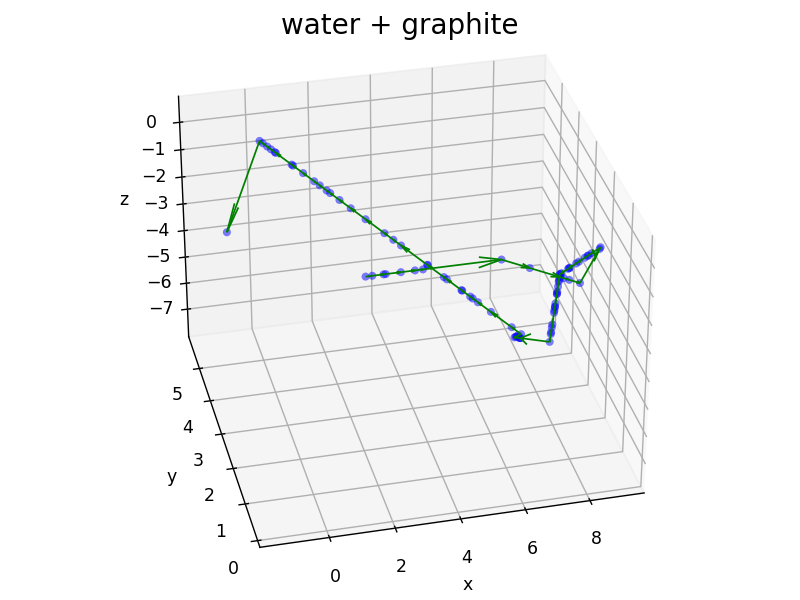

In [34]:
get_ipython().magic('matplotlib notebook')
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
print('The percentage of transmitted neutrons is {0:.3f} +/- {1:.3f} %'.format(percentage_transmitted,\
                                                                              std_percentage_transmitted))
plot_walk(final_path,'water + graphite')